In [1]:
import numpy as np
import tensorflow as tf
import pickle
import awkward as ak

import sys
sys.path.append("..")
from make_plots import *

2024-04-22 23:02:57.581647: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-22 23:02:57.581698: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
save_plot = False
save_as = "Apr22_added_lepton"
testing_ds = "trained_models/Apr22_with_lep_bigger"
testing_data = "/data_ceph/tost/ds_inputs/Apr22_gn2/testing.pkl"

In [3]:
# open the classifier
classifier = tf.keras.models.load_model(testing_ds)

# open the testing data
with open(testing_data, 'rb') as file:
    testing = pickle.load(file)

testing_input = tf.keras.preprocessing.sequence.pad_sequences(
            testing['input'],
            dtype='float32',
            padding='post',
            maxlen=12)

testing_truth = tf.keras.preprocessing.sequence.pad_sequences(
            testing['flavor'],
            dtype='float32',
            padding='post',
            maxlen=12)

testing_input = tf.constant(testing_input).numpy()


2024-04-22 23:03:02.861410: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-04-22 23:03:02.861563: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-04-22 23:03:02.861594: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (top1.hep.utexas.edu): /proc/driver/nvidia/version does not exist
2024-04-22 23:03:02.862377: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
deepset_output = classifier.predict(testing_input)

In [5]:
scores_b_4vec, scores_l_4vec, scores_glu_4vec, truth_b_4vec, truth_l_4vec, truth_glu_4vec = [], [], [], [], [], []

# loop over all the entries, and make new lists with the individual entries and their truth
# be careful with the positions you put where! Currently set up for: [bottom, light, glu]
for i in range(len(deepset_output)):
    for j in range(len(deepset_output[i])):
        if ak.sum(testing_truth[i][j]) == 0: continue

        scores_b_4vec.append(deepset_output[i][j][0])
        scores_l_4vec.append(deepset_output[i][j][1])
        scores_glu_4vec.append(deepset_output[i][j][2])

        truth_b_4vec.append(testing_truth[i][j][0])
        truth_l_4vec.append(testing_truth[i][j][1])
        truth_glu_4vec.append(testing_truth[i][j][2])


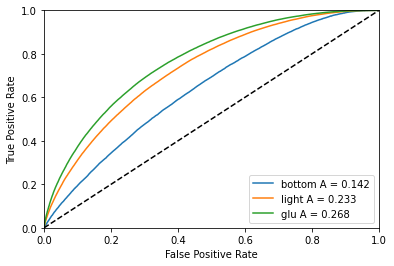

In [6]:
#import importlib
#import make_plots
#importlib.reload(make_plots)

plot_roc({'bottom': {'scores': scores_b_4vec, 'truth': truth_b_4vec},
          'light': {'scores': scores_l_4vec, 'truth': truth_l_4vec},
          'glu': {'scores': scores_glu_4vec, 'truth': truth_glu_4vec}})

Below this is just the same code but for dot product inputs

In [ ]:
import numpy as np
import tensorflow as tf
import pickle
import awkward as ak

import sys
sys.path.append("..")
from make_plots import *

In [ ]:
testing_ds = "trained_models/Mar21_ttbar_spurions_onlydot"
testing_data = "/data_ceph/tost/ds_inputs/Mar20_ttbar_spurions/testing.pkl"

In [ ]:
# open the classifier
classifier = tf.keras.models.load_model(testing_ds)

# open the training data dictionary, and apply padding
with open(testing_data, 'rb') as file:
    testing = pickle.load(file)


max_length = 15
print("max size is: {}".format(max_length))
padded_input = []

#### this is for the dot-only situation!!
# need to do double padding with the dot product stuff!
for sample in testing['input']:
    padded_sample = np.pad(sample, ((0, max_length - len(sample)), (0, max_length - len(sample))), mode='constant', constant_values=0)
    padded_input.append(padded_sample)
testing['input'] = padded_input


testing_input = tf.keras.preprocessing.sequence.pad_sequences(
            testing['input'],
            dtype='float32',
            padding='post',
            maxlen=15)

testing_truth = tf.keras.preprocessing.sequence.pad_sequences(
            testing['flavor'],
            dtype='float32',
            padding='post',
            maxlen=15)
testing_input = testing['input']

testing_input = tf.constant(testing_input).numpy()

In [ ]:
deepset_output = classifier.predict(testing_input)

In [ ]:
scores_b_dot, scores_l_dot, scores_glu_dot, truth_b_dot, truth_l_dot, truth_glu_dot = [], [], [], [], [], []

# loop over all the entries, and make new lists with the individual entries and their truth
# be careful with the positions you put where! Currently set up for: [bottom, light, glu]
for i in range(len(deepset_output)):
    for j in range(len(deepset_output[i])):
        if ak.sum(testing_truth[i][j]) == 0: continue

        scores_b_dot.append(deepset_output[i][j][0])
        scores_l_dot.append(deepset_output[i][j][1])
        scores_glu_dot.append(deepset_output[i][j][2])

        truth_b_dot.append(testing_truth[i][j][0])
        truth_l_dot.append(testing_truth[i][j][1])
        truth_glu_dot.append(testing_truth[i][j][2])

In [ ]:
plot_roc({'bottom': {'scores': scores_b_dot, 'truth': truth_b_dot},
          'light': {'scores': scores_l_dot, 'truth': truth_l_dot},
          'glu': {'scores': scores_glu_dot, 'truth': truth_glu_dot}})

Do it again for kinematics and dot product

In [ ]:
import numpy as np
import tensorflow as tf
import pickle
import awkward as ak

import sys
sys.path.append("..")
from make_plots import *

In [ ]:
testing_ds = "trained_models/Mar21_ttbar_spurions_kindot"
testing_data = "/data_ceph/tost/ds_inputs/Mar20_ttbar_spurions_kindot/testing.pkl"

In [ ]:
classifier = tf.keras.models.load_model(testing_ds)

# open the training data dictionary, and apply padding
with open(testing_data, 'rb') as file:
    testing = pickle.load(file)


# Find the maximum additional dimension across all samples
additional_dim_max = 18 #max(len(sample[0]) for sample in testing['input'] if isinstance(sample[0], (list, np.ndarray)))

# Pad each sample to have the same additional dimension size
padded_input_with_additional_dim = []
for sample in testing['input']:
    padding_needed = additional_dim_max - len(sample[1])
    if padding_needed < 0:
        continue
    padded_sample = np.pad(sample, ((0, 0), (0, padding_needed)), mode='constant', constant_values=0)
    padded_input_with_additional_dim.append(padded_sample)

# Replace the original input with the newly padded input
testing['input'] = padded_input_with_additional_dim


testing_input = tf.keras.preprocessing.sequence.pad_sequences(
            testing['input'],
            dtype='float32',
            padding='post',
            maxlen=8)

testing_truth = tf.keras.preprocessing.sequence.pad_sequences(
            testing['flavor'],
            dtype='float32',
            padding='post',
            maxlen=8)


testing_input = tf.constant(testing_input).numpy()


In [ ]:
deepset_output = classifier.predict(testing_input)

In [ ]:
scores_b_dot_kin, scores_l_dot_kin, scores_glu_dot_kin, truth_b_dot_kin, truth_l_dot_kin, truth_glu_dot_kin = [], [], [], [], [], []

# loop over all the entries, and make new lists with the individual entries and their truth
# be careful with the positions you put where! Currently set up for: [bottom, light, glu]
for i in range(len(deepset_output)):
    for j in range(len(deepset_output[i])):
        if ak.sum(testing_truth[i][j]) == 0: continue

        scores_b_dot_kin.append(deepset_output[i][j][0])
        scores_l_dot_kin.append(deepset_output[i][j][1])
        scores_glu_dot_kin.append(deepset_output[i][j][2])

        truth_b_dot_kin.append(testing_truth[i][j][0])
        truth_l_dot_kin.append(testing_truth[i][j][1])
        truth_glu_dot_kin.append(testing_truth[i][j][2])

In [ ]:
plot_roc({'bottom': {'scores': scores_b_dot_kin, 'truth': truth_b_dot_kin},
          'light': {'scores': scores_l_dot_kin, 'truth': truth_l_dot_kin},
          'glu': {'scores': scores_glu_dot_kin, 'truth': truth_glu_dot_kin}})

In [ ]:
testing_ds = "trained_models/Mar21_ttbar_spurions_dot_spur"
testing_data = "/data_ceph/tost/ds_inputs/Mar21_ttbar_spurions_dot_spur/testing.pkl"

In [ ]:
classifier = tf.keras.models.load_model(testing_ds)

# open the training data dictionary, and apply padding
with open(testing_data, 'rb') as file:
    testing = pickle.load(file)


# Find the maximum additional dimension across all samples
additional_dim_max = 17

# Pad each sample to have the same additional dimension size
padded_input_with_additional_dim = []
for sample in testing['input']:
    padding_needed = additional_dim_max - len(sample[1])
    if padding_needed < 0:
        continue
    padded_sample = np.pad(sample, ((0, 0), (0, padding_needed)), mode='constant', constant_values=0)
    padded_input_with_additional_dim.append(padded_sample)

# Replace the original input with the newly padded input
testing['input'] = padded_input_with_additional_dim


testing_input = tf.keras.preprocessing.sequence.pad_sequences(
            testing['input'],
            dtype='float32',
            padding='post',
            maxlen=8)

testing_truth = tf.keras.preprocessing.sequence.pad_sequences(
            testing['flavor'],
            dtype='float32',
            padding='post',
            maxlen=8)


testing_input = tf.constant(testing_input).numpy()


In [ ]:
deepset_output = classifier.predict(testing_input)

In [ ]:
scores_b_spur, scores_l_spur, scores_glu_spur, truth_b_spur, truth_l_spur, truth_glu_spur = [], [], [], [], [], []

# loop over all the entries, and make new lists with the individual entries and their truth
# be careful with the positions you put where! Currently set up for: [bottom, light, glu]
for i in range(len(deepset_output)):
    for j in range(len(deepset_output[i])):
        if ak.sum(testing_truth[i][j]) == 0: continue

        scores_b_spur.append(deepset_output[i][j][0])
        scores_l_spur.append(deepset_output[i][j][1])
        scores_glu_spur.append(deepset_output[i][j][2])

        truth_b_spur.append(testing_truth[i][j][0])
        truth_l_spur.append(testing_truth[i][j][1])
        truth_glu_spur.append(testing_truth[i][j][2])

In [ ]:
plot_roc({'bottom': {'scores': scores_b_spur, 'truth': truth_b_spur},
          'light': {'scores': scores_l_spur, 'truth': truth_l_spur},
          'glu': {'scores': scores_glu_spur, 'truth': truth_glu_spur}})

In [ ]:
plot_roc({'bottom 4vec': {'scores': scores_b_4vec, 'truth': truth_b_4vec},
          'bottom dot': {'scores': scores_b_dot, 'truth': truth_b_dot},
          'bottom 4vec+dot': {'scores': scores_b_dot_kin, 'truth': truth_b_dot_kin},
          'bottom spurions': {'scores': scores_b_spur, 'truth': truth_b_spur}})

In [ ]:
plot_roc({'light 4vec': {'scores': scores_l_4vec, 'truth': truth_l_4vec},
          'light dot': {'scores': scores_l_dot, 'truth': truth_l_dot},
          'light 4vec+dot': {'scores': scores_l_dot_kin, 'truth': truth_l_dot_kin},
          'light spurions': {'scores': scores_l_spur, 'truth': truth_l_spur}})

In [ ]:
plot_roc({'glu 4vec': {'scores': scores_glu_4vec, 'truth': truth_glu_4vec},
          'glu dot': {'scores': scores_glu_dot, 'truth': truth_glu_dot},
          'glu 4vec+dot': {'scores': scores_glu_dot_kin, 'truth': truth_glu_dot_kin},
          'glu spurions': {'scores': scores_glu_spur, 'truth': truth_glu_spur}})